# Elections et cartes électorales - énoncé

D'après wikipédia, le [Gerrymandering](https://fr.wikipedia.org/wiki/Gerrymandering) est un terme politique nord-américain pour désigner le découpage des circonscriptions électorales ayant pour objectif de donner l’avantage à un parti, un candidat, ou un groupe donné. Et c'est ce que nous allons faire dans cette séance. C'est un problème tout-à-fait d'actualité : [Primaire de la droite : 10 228 bureaux de vote stratégiquement répartis](http://www.lemonde.fr/election-presidentielle-2017/article/2016/09/30/primaire-de-la-droite-10-228-bureaux-de-vote-strategiquement-repartis_5005831_4854003.html).

In [1]:
%matplotlib inline

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Données

Les données sont de plusieurs types et sont regroupées en trois fichiers :

* [Résultat des élections législatives françaises de 2012 au niveau bureau de vote](https://www.data.gouv.fr/fr/datasets/resultat-des-elections-legislatives-francaises-de-2012-au-niveau-bureau-de-vote-nd/)
* [Countours des circonscriptions des législatives](https://www.data.gouv.fr/fr/datasets/countours-des-circonscriptions-des-legislatives-nd/)
* [Localisation des buraux de votes](http://www.xavierdupre.fr/enseignement/complements/bureauxvotegeo.zip)
* [Localisation des villes](https://github.com/sdpython/actuariat_python/raw/master/src/actuariat_python/data/data_elections/villes_geo.zip)
* [Localisation des bureaux de vote avec Cartelec](http://www.cartelec.net/?page_id=3609), cette base requiert la conversion des coordonnées (lire ce [notebook](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/td1a_cenonce_session_12.html#cartographie))

Il est conseillé de télécharger directement ces données. Les paragraphes suivants expliquent comment ceux-ci ont été récupérés ou construit. Il n'est pas immédiat d'obtenir la localisation des bureaux de vote. Celle-ci n'est d'ailleurs pas complète.

### Résultats des élections législatives

In [3]:
from actuariat_python.data import elections_legislatives_bureau_vote
tour = elections_legislatives_bureau_vote()

In [4]:
tour["T2"].sort_values(["Code département", "N° de circonscription Lg"]).head()

,N° tour,Code département,Code de la commune,Nom de la commune,N° de circonscription Lg,N° de canton,N° de bureau de vote,Inscrits,Votants,Exprimés,N° de dépôt du candidat,Nom du candidat,Prénom du candidat,Code nuance du candidat,Nombre de voix du candidat
3858,2,01,16,Arbigny,1,26,0001,309,146,144,32,BRETON,Xavier,UMP,87
3859,2,01,16,Arbigny,1,26,0001,309,146,144,33,DEBAT,Jean-François,SOC,57
3871,2,01,24,Attignat,1,21,0001,746,425,411,32,BRETON,Xavier,UMP,233
3872,2,01,24,Attignat,1,21,0001,746,425,411,33,DEBAT,Jean-François,SOC,178
3873,2,01,24,Attignat,1,21,0002,1311,801,792,32,BRETON,Xavier,UMP,446


### Géolocalisation des circonscription

In [5]:
from actuariat_python.data import elections_legislatives_circonscription_geo
geo = elections_legislatives_circonscription_geo()

In [6]:
geo.sort_values(["department", "code_circonscription"]).head()

,code_circonscription,department,numero,communes,kml_shape,simple_form
11,01001,01,1,01053-01072-01106-01150-01177-01184-01195-0124...,<Polygon><outerBoundaryIs><LinearRing><coordin...,False
12,01002,01,2,01008-01047-01099-01202-01213-01224-01366-0138...,<Polygon><outerBoundaryIs><LinearRing><coordin...,True
13,01003,01,3,01033-01044-01081-01091-01174-01189-01215-0125...,<Polygon><outerBoundaryIs><LinearRing><coordin...,True
14,01004,01,4,01023-01025-01026-01144-01159-01231-01320-0133...,<Polygon><outerBoundaryIs><LinearRing><coordin...,False
15,01005,01,5,01002-01004-01007-01041-01089-01149-01345-0137...,<Polygon><outerBoundaryIs><LinearRing><coordin...,True


In [7]:
c = list(geo.sort_values(["department", "code_circonscription"])["communes"])[0].split("-")
c.sort()
c[:5]

['01016', '01024', '01029', '01038', '01040']

In [8]:
list(geo.sort_values(["department", "code_circonscription"])["kml_shape"])[:1]

['<Polygon><outerBoundaryIs><LinearRing><coordinates>5.294455999999968,46.193934 5.279780999999957,46.201967 5.2820520000000215,46.211633 5.258239693115229,46.21151582325097 5.2581992646485105,46.2083773977195 5.246123010742167,46.20489445115752 5.245254158935495,46.20280868033653 5.240432576904368,46.199348983660926 5.23716710070812,46.19529946757567 5.229953412841837,46.195408656674 5.226543291137659,46.20120799400516 5.214944595275824,46.20383315680887 5.210212354492228,46.20764618417071 5.205343111083948,46.20376238484074 5.206997000000001,46.191323 5.19510600000001,46.18786 5.187468999999965,46.190827 5.170859999999948,46.203126 5.162395999999944,46.199387 5.15610700000002,46.189904 5.142047000000048,46.192223 5.123888999999963,46.207671 5.111119000000031,46.203891 5.097426000000041,46.206108 5.089811999999938,46.195268 5.068122000000017,46.208969 5.058287999999948,46.22074 5.05758000000003,46.224014 5.065923999999995,46.231556 5.093984999999975,46.232529 5.095609999999965,46.2356

### Géolocation des bureaux de vote

Ces données sont importantes afin de pouvoir associer chaque bureau à une circonscription. C'est la donnée la plus compliquée à obtenir car elle nécessite de combiner plusieurs techniques et sources de données pour obtenir une table propre. Le fichier final peut être obtenu comme suit :

In [9]:
from actuariat_python.data import elections_vote_places_geo
bureau_geo = elections_vote_places_geo()

In [10]:
bureau_geo.head()

,address,city,n,place,zip,full_address,latitude,longitude,geo_address
0,cours verdun,bourg,1,salle des fêtes,1000,cours verdun 01000 bourg,46.206605,5.228364,"Cours de Verdun, Le Peloux, Les Vennes, Bourg-..."
1,cours verdun,bourg,2,salle des fêtes,1000,cours verdun 01000 bourg,46.206605,5.228364,"Cours de Verdun, Le Peloux, Les Vennes, Bourg-..."
2,rue antoine de saint exupéry,bourg-en-bresse,3,"groupe scolaire saint-exupéry - salle de jeux,...",1000,rue antoine de saint exupéry 01000 bourg-en-br...,46.210030,5.233330,"Rue Antoine de Saint-Exupéry, Bourg-en-Bresse,..."
3,11 avenue de l’égalité,bourg-en-bresse,4,charles perrault - école primaire,1000,11 avenue de l’égalité 01000 bourg-en-bresse,46.214848,5.231941,"11, Avenue de l'Égalité, Saint-Georges, La Gla..."
4,11 avenue de l’égalité,bourg-en-bresse,5,charles perrault - école primaire,1000,11 avenue de l’égalité 01000 bourg-en-bresse,46.214848,5.231941,"11, Avenue de l'Égalité, Saint-Georges, La Gla..."


**Ce qui suit explique la façon dont j'ai constuit cette table.**

Les bureaux sont assez stables d'une élection à l'autre et cela ne devrait pas trop poser de problèmes si on mélange les données. En revanche, ces données sont assez difficiles à obtenir. [open.data.fr](https://www.data.gouv.fr/fr/datasets/?q=bureaux+de+vote&page=1) propose ces données mais il faut récupérer chaque ville ou chaque région séparément sans garantie de réussir à couvrir tout le territoire. Le site [NosDonnes.fr](http://www.nosdonnees.fr/dataset/golocalisation-des-bureaux-de-votes) recense bien toutes ces informations mais il n'est pas possible - au moment où j'écris ces lignes - de récupérer ces données sous la forme d'un fichier plat. De plus, certaines régions ne sont disponibles que sous forme de scan d'impressions papier. C'est en lisant l'article [Comment redécoupe-t-on la carte électorale?](http://www.slate.fr/story/3945/comment-redecouper-t-la-carte-electorale) que je suis tombé finalement sur la base constituée pour rédiger l'article [Etude sur le redécoupage électoral : évaluer le poids politique de la réforme](https://www.regardscitoyens.org/etude-sur-le-redecoupage-electoral-poids-politique-reforme/). Les données sont accessibles sur [RegardsCitoyens.fr](https://www.regardscitoyens.org/publication/#donnees) et en cherchant bien, on trouve le répertoire [redécoupage](https://www.regardscitoyens.org/telechargement/redecoupage/) et le fichier [2014041401_resultats.csv.zip](https://www.regardscitoyens.org/telechargement/redecoupage/2014041401_resultats.csv.zip). Cependant, la géolocalisation des bureaux n'est pas souvent renseignée. On peut se contenter des fichiers obtenus pour quelques zones seulement : [Paris](https://www.data.gouv.fr/fr/datasets/liste-des-bureaux-de-vote-prs/), [Gironde](https://www.data.gouv.fr/fr/datasets/geo-localisation-des-bureaux-de-vote-du-departement-de-la-gironde-rdl/), [Montpellier](https://www.data.gouv.fr/fr/datasets/bureaux-de-vote-mtn/), [Marseille](https://www.data.gouv.fr/fr/datasets/bureaux-de-vote-de-marseille-op/), [Saint-Malo](https://www.data.gouv.fr/fr/datasets/emplacement-des-bureaux-de-vote/), [Nogent-Sur-Marne](https://www.data.gouv.fr/fr/datasets/bureaux-de-vote-de-la-ville-de-nogent-sur-marne/), [Haut-de-Seine](https://www.data.gouv.fr/fr/datasets/bureaux-de-vote-7/), [Toulouse](https://www.data.gouv.fr/fr/datasets/bureaux-de-vote-2012/), [Grand-Poitiers](https://www.data.gouv.fr/fr/datasets/citoyennete-bureaux-de-vote-grand-poitiers-donnees-de-reference/), [Calvados](https://www.data.gouv.fr/fr/datasets/bureaux-centralisateurs-des-circonscriptions-cantonales-dans-le-calvados/). Cette approche risque d'être fastidieuse dans la mesure où les formats pour chaque ville ont de grande chance d'être différent. 

La meilleure option est peut-être de scrapper le site [bureaudevote.fr](http://bureaudevote.fr/bureaudevote00.htm) - qui fonctionne bien quand il n'est pas en maintenance - en espérant que les numéros des bureaux de votes correspondent. Le site propose seulement les adresses. Il faudra utiliser une API de geocoding. Quelque soit la source, on supposera alors que tous les bureaux de vote associés au même emplacement feront nécessairement partie de la même circonscription. Bref, **l'open data passe aussi par une certaine standardisation !**

Certains départements ne sont pas renseignés, la Drôme par exemple. Il faut aller sur d'autres sites comme [linternaute.com](http://www.linternaute.com/ville/valence/ville-26362/bureaux-vote#ville-26362-1), accéder à la [carte](http://www.linternaute.com/ville/p-bureau-vote#trouver-bureau-vote), mais il faudra un peu plus de temps pour récupérer toutes ces informations. Le code proposé ci-dessus récupère les coordonnées des bureaux de vote. Cela prend plusieurs heures et il faut relancer le processus quand il s'arrête pour une erreur de réseau. Il est conseillé de télécharger le résultat. Le géocodeur d'[OpenStreetMap](http://openstreetmap.fr/) n'est pas de très bonne qualité sur la France. Il ne retourne rien dans plus d'un tiers des cas. On peut compléter avec l'[API de Bing Maps](https://www.microsoft.com/maps/choose-your-bing-maps-API.aspx).

In [11]:
from actuariat_python.data import elections_vote_place_address
bureau = elections_vote_place_address(hide_warning=True)

In [12]:
bureau.head()

,address,city,n,place,zip
0,cours verdun,bourg,1,salle des fêtes,01000
1,cours verdun,bourg,2,salle des fêtes,01000
2,rue antoine de saint exupéry,bourg-en-bresse,3,"groupe scolaire saint-exupéry - salle de jeux,...",01000
3,11 avenue de l’égalité,bourg-en-bresse,4,charles perrault - école primaire,01000
4,11 avenue de l’égalité,bourg-en-bresse,5,charles perrault - école primaire,01000


On récupère une clé pour utiliser l'[API de Bing Maps](https://www.microsoft.com/maps/choose-your-bing-maps-API.aspx) avec le module [keyring](http://pythonhosted.org/keyring/). Pour stocker son mot de passe sur la machine, il suffit d'écrire :

```
import keyring
keyring.get_password("bing", "actuariat_python,key")
```

In [13]:
import keyring, os
bing_key = keyring.get_password("bing", "actuariat_python,key")
coders = ["Nominatim"]
if bing_key:
    # si la clé a été trouvée
    coders.append(("bing", bing_key))
len(coders)

2

In [14]:
import os
if not os.path.exists("bureauxvotegeo.zip"):
    from actuariat_python.data import geocode
    from pyquickhelper.loghelper import fLOG
    fLOG(OutputPrint=True)
    bureau_geo = geocode(bureau, fLOG=fLOG, index=False, encoding="utf-8",
                         exc=False, save_every="bureau.dump.txt", sep="\t", every=100,
                         coders=coders)
else:
    print("Les données ont déjà été geocodées.")

Les données ont déjà été geocodées.


On regarde les valeurs manquantes.

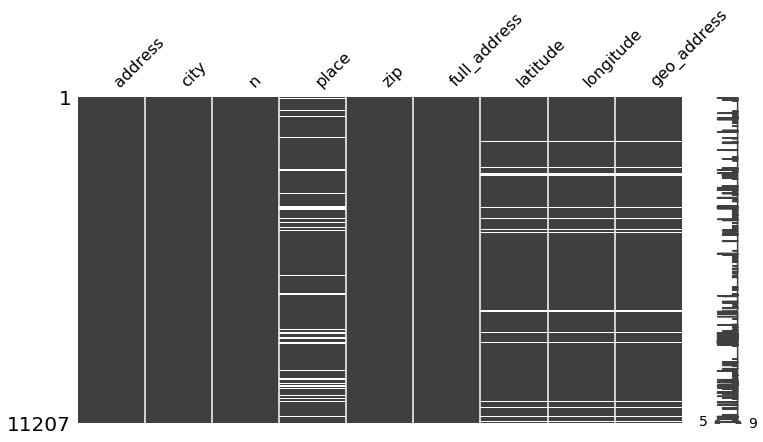

In [15]:
import missingno
missingno.matrix(bureau_geo, figsize=(12, 6))

On pourra finalement récupérer la base des géocodes comme ceci :

In [16]:
from actuariat_python.data import elections_vote_places_geo
places = elections_vote_places_geo()
places.head()

,address,city,n,place,zip,full_address,latitude,longitude,geo_address
0,cours verdun,bourg,1,salle des fêtes,1000,cours verdun 01000 bourg,46.206605,5.228364,"Cours de Verdun, Le Peloux, Les Vennes, Bourg-..."
1,cours verdun,bourg,2,salle des fêtes,1000,cours verdun 01000 bourg,46.206605,5.228364,"Cours de Verdun, Le Peloux, Les Vennes, Bourg-..."
2,rue antoine de saint exupéry,bourg-en-bresse,3,"groupe scolaire saint-exupéry - salle de jeux,...",1000,rue antoine de saint exupéry 01000 bourg-en-br...,46.210030,5.233330,"Rue Antoine de Saint-Exupéry, Bourg-en-Bresse,..."
3,11 avenue de l’égalité,bourg-en-bresse,4,charles perrault - école primaire,1000,11 avenue de l’égalité 01000 bourg-en-bresse,46.214848,5.231941,"11, Avenue de l'Égalité, Saint-Georges, La Gla..."
4,11 avenue de l’égalité,bourg-en-bresse,5,charles perrault - école primaire,1000,11 avenue de l’égalité 01000 bourg-en-bresse,46.214848,5.231941,"11, Avenue de l'Égalité, Saint-Georges, La Gla..."


### Géolocalisation des villes

In [17]:
from actuariat_python.data import elections_vote_places_geo
bureau_geo = elections_vote_places_geo()
villes_geo = bureau_geo[["city", "zip", "n"]].groupby(["city", "zip"], as_index=False).count()
villes_geo.head()

,city,zip,n
0,abbeville,80100,17
1,ableiges,95450,2
2,ablis,78660,2
3,ablon,94480,4
4,achères,78260,12


In [18]:
from actuariat_python.data import villes_geo
villes_geo = villes_geo(as_df=True)
villes_geo.head()

,city,zip,n,full_address,latitude,longitude,geo_address
0,abbeville,80100,17,80100 abbeville France,30.206659,-92.008957,"Nan Dr, Lafayette, LA 70503, United States"
1,ableiges,95450,2,95450 ableiges France,49.090165,1.981233,"Ableiges, Pontoise, Val-d'Oise, Île-de-France,..."
2,ablis,78660,2,78660 ablis France,48.517153,1.836876,"Ablis, Rambouillet, Yvelines, Île-de-France, 7..."
3,ablon,94480,4,94480 ablon France,48.723640,2.414800,"Rue d'Ablon, Ablon-sur-Seine, IdF 94480, France"
4,achères,78260,12,78260 achères France,48.960266,2.070165,"Achères, Saint-Germain-en-Laye, Yvelines, Île-..."


In [19]:
import keyring, os
bing_key = keyring.get_password("bing", "actuariat_python,key")
coders = []
if bing_key:
    # si la clé a été trouvée
    coders.append(("bing", bing_key))
len(coders)

1

In [20]:
import os
geocode = True
if geocode:
    if os.path.exists("villes_geo"):
        villes_geo = pandas.read_csv("villes_geo.txt", sep="\t", encoding="utf-8")
    else:
        from actuariat_python.data import geocode
        from pyquickhelper.loghelper import fLOG
        fLOG(OutputPrint=True)
        villes_geo = geocode(villes_geo, fLOG=fLOG, index=False, encoding="utf-8",
                             exc=False, save_every="villes.dump.txt", sep="\t", every=100,
                             coders=coders, country="France")

2017-08-29 21:53:26 
2017-08-29 21:53:26 load  villes.dump.txt
2017-08-29 21:53:26 saving place 0/584 - errors=0 - no-result=0
2017-08-29 21:53:26 saving place 100/584 - errors=0 - no-result=0
2017-08-29 21:53:26 saving place 200/584 - errors=0 - no-result=0
2017-08-29 21:53:26 saving place 300/584 - errors=0 - no-result=0
2017-08-29 21:53:27 saving place 400/584 - errors=0 - no-result=0
2017-08-29 21:53:27 saving place 500/584 - errors=0 - no-result=0
2017-08-29 21:53:27 geocode place 583/584 - errors=0 - no-result=0


In [21]:
villes_geo.head()

,city,zip,n,full_address,latitude,longitude,geo_address
0,abbeville,80100,17,80100 abbeville France,50.109188,1.833270,"Abbeville, Nord-Pas-de-Calais-Picardie 80100, ..."
1,ableiges,95450,2,95450 ableiges France,49.092121,1.982560,"Ableiges, IdF, France"
2,ablis,78660,2,78660 ablis France,48.504829,1.860777,"Ablis, IdF 78660, France"
3,ablon,94480,4,94480 ablon France,48.723869,2.419967,"Ablon-sur-Seine, IdF 94480, France"
4,achères,78260,12,78260 achères France,48.967705,2.065866,"Achères, IdF 78260, France"


On conserve les données pour éviter de les reconstuire et faire appel à l'API Bing à nouveau.

In [22]:
villes_geo.to_csv("villes_geo.txt", sep="\t", index=False, encoding="utf-8")

In [23]:
villes_geo.shape

(584, 7)

## Géolocation des bureaux de vote avec Cartélec

Le site [cartelec](http://www.cartelec.net/?page_id=3609) recense beaucoup plus de bureaux de vote mais pour les élections 2007. Ils ne devraient pas avoir changé beaucoup.

In [24]:
from pyensae.datasource import download_data
shp_vote = download_data("base_cartelec_2007_2010.zip")
shp_vote

['fond0710.dbf', 'fond0710.shp', 'fond0710.shx']

In [25]:
# La version 2.0.0.dev de pyshp est buggée. Il vaut mieux ne pas l'utiliser.
import shapefile
if "dev" in shapefile.__version__:
    raise ImportError("Use a different version of pyshp not '{0}'".format(shapefile.__version__))
r = shapefile.Reader("fond0710.shp")
shapes = r.shapes()
records = r.records()
len(shapes), len(records)

(50578, 50578)

In [26]:
{k[0]:v for k,v in zip(r.fields, records[0])}

{'BUREAU': '01001',
 'CANTON': '04',
 'CODE': b"L'Abergement-Cl\xe9menciat",
 'CODEARRT': '01',
 'CODECANT': 'CHATILLON-SUR-CHALARONNE',
 'CODEDEP': '82',
 'CODEREG': '10',
 'DeletionFlag': '01001',
 'NOM': '012'}

In [27]:
shapes[0].points

[(846774.7025280485, 6563840.655779875),
 (847430.4726776106, 6566444.631470905),
 (848975.0615885032, 6566530.102978201),
 (849532.5253064571, 6565971.4588501565),
 (848969.0813380895, 6564398.911644492),
 (850941.7401535356, 6563209.5425065085),
 (849896.4212796891, 6562719.844144765),
 (849632.2745031306, 6561522.415193593),
 (849891.0276243397, 6560738.406460746),
 (848732.0257644501, 6559575.068823495),
 (848585.9032087281, 6560169.582690463),
 (847664.0345600601, 6560616.395794825),
 (847793.2580021, 6562243.125831007),
 (846774.7025280485, 6563840.655779875)]

## Exercice 1

* Etablir un plan d'action
* Détailler la mise en oeuvre de ce plan à partir des données
* Répartir les tâches sur plusieurs équipes

## Exercice 2

Mettre en oeuvre le plan d'action.